# Scholar Data 2 Website (or WordPress blog) with R 
This tutorial & code pulls data from the google scholar API, and makes an image (along with an optional graph of your citations per year) that can be hosted online (maybe using services like Dropbox or GoogleDrive's public sharing).

This tutorial is based on an R-bloggers post by XXX with some **graphical changes *and* the ability to display a bit more of useful info.**

## What you need
- a google scholar profile (e.g., INSERT MY GSCHOLAR PROFILE)
- UNIX-based system (e.g., Mac OS X, Linux)
- R (R Website) 
- crontab
- R packages:
    - `scholar`: convenience functions to get data from scholar API
    - `ggplot2`: powerful & flexible plotting package.
    - `grid` : package part of the R-base packages, allows graph layout customisations.


## `Scholar` R Package
James Keirstead, designed a really cool package that interacts with the google scholar API. It pulls data from your scholar profile, like your citation history, and it also contains a cool function to predict your h-index based on the [Acuna et al. (2012)](http://www.nature.com/nature/journal/v489/n7415/full/489201a.html) model which is fine tuned for neuroscience. You can find more info about the R package and its functions on [James' blog](http://www.jameskeirstead.ca/blog/new-r-package-scholar/).

### 1. Getting data from a profile
First, you need to know your **Researcher ID** that google arbitrarily created for you when you made your profile.

For example this is the URL to the profile of a really cool philosopher/psychologist called [Andy Clark](https://en.wikipedia.org/wiki/Andy_Clark). As an aside this researcher has a really interesting view on how the human brain function that is worth checking out if you're interested.
Anyway, back to the URL to his profile: https://scholar.google.co.uk/citations?user=FYrnmlIAAAAJ&hl=en.    
If you look at the URL there is an arbitrary looking string of characters just after `user=` and it stops at the `&` for Andy's profile it's `FYrnmlIAAAAJ`.

#### 1.1. Profile

In [1]:
#load the package first otherwise R won't be able to find the functions later.
library(scholar)

#load your profile data FYrnmlIAAAAJ
profile=get_profile('FYrnmlIAAAAJ')

#look at the information you pulled out
profile

$id
[1] "FYrnmlIAAAAJ"

$name
[1] "Andy Clark"

$affiliation
[1] "University of Edinburgh"

$total_cites
[1] 21866

$h_index
[1] 51

$i10_index
[1] 112

$fields
[1] "philosophy of cognitive science"

$homepage
[1] "http://www.philosophy.ed.ac.uk/people/view.php?name=andy-clark-frse"

As you can see, the function has pulled out all the information that you could see on the google page, and it has stored them in sub fields so that you can easily access **just** the *number of citations* or his *h-index* etc.

In [2]:
#here's how you get only the total citations
profile$total_cites

[1] 21866

In [3]:
#here's how you get the h-index
profile$h_index

[1] 51

#### 1.2. Citation history
You may also be interested in reproducing the graph that google generates with your citation history. For this we will use the function `get_citation_history()`. We now have a neat little table that contains number of citations per year. Grea! So we can reproduce the google plot!

In [4]:
history=get_citation_history('FYrnmlIAAAAJ')
history

,year,cites
1,2007,1079
2,2008,1382
3,2009,1320
4,2010,1574
5,2011,1564
6,2012,1671
7,2013,2604
8,2014,2192
9,2015,1679


## Plotting Scholar Cites
### Basic graph
I'm using the `ggplot2` R package. It's one of the most popular graphing packages and is super flexible. I'm going to skip over explaining how ggplot works because there are a million tutorials online.

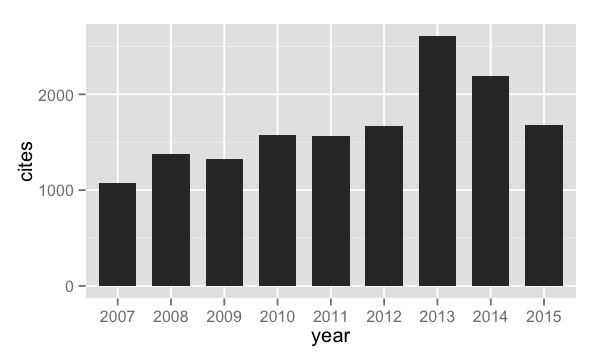

In [8]:
#the two following lines just set a custom size for the plot, not necessary when running in R.
options(repr.plot.width = 5) 
options(repr.plot.height = 3)

library(ggplot2)

#we want to make sure that the column year is a factor so that ggplot
#doesn't treat it as a continuous variable (that would create missing tick)
history$year=as.factor(history$year)

#set up plot in r 
histGraph=ggplot(data=history, aes(x=year, y=cites))

#add layers of plot (here bars)
histGraph+geom_bar(stat='identity',width=.7)

There you go, here's the basic graph that reproduces the google scholar bar chart. We'll work on this graph from now on. We can make it a bit cleaner and nicer looking by adding some cosmetic make up. Again, I won't go into details on how to do this with ggplot but the code should give you an indication of how it works and if not there are tons of tutorials and posts online that explains most of the scenarios you might want to implement.

### Bit More Stylish

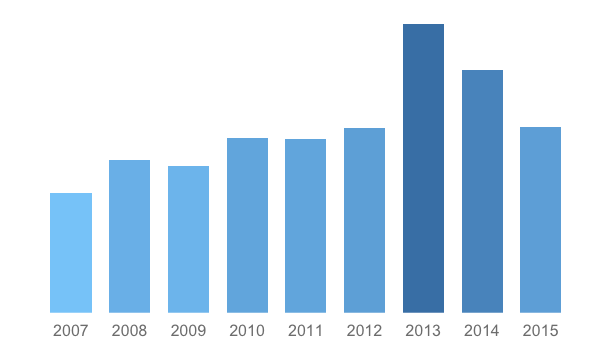

In [17]:
histGraph=ggplot(data=history, aes(x=year, y=cites,fill=cites)) #fill will colour the bars.
histGraph+geom_bar(stat='identity',width=.7)+
    scale_fill_gradient(low = "lightskyblue", high = "steelblue")+ #colours the bars should take
    theme(panel.background=element_blank())+ #removes grey background
    theme(panel.grid=element_blank())+ #removes lines for the grid
    theme(axis.ticks=element_blank())+ #removes ticks on both axes
    theme(axis.text.y=element_blank())+ #removes tick text for y axis
    theme(axis.title=element_blank())+ #removes axes titles
    scale_y_discrete(expand = c(0, 0))+ #makes sure y starts at 0
    theme(legend.position='none') #removes the legend

We could of course plot a simple line and points (depends on your preferences of course but here's an example

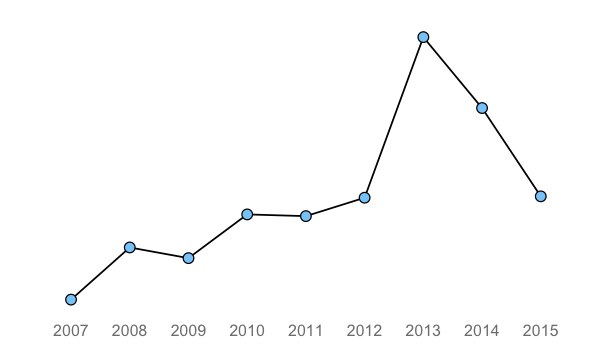

In [22]:
histGraph=ggplot(data=history, aes(x=year, y=cites))
histGraph+geom_line(stat='identity',aes(group=1),colour='black')+
    geom_point(size=3,colour='black',fill='lightskyblue',pch=21)+
    theme(panel.background=element_blank())+ #removes grey background
    theme(panel.grid=element_blank())+ #removes lines for the grid
    theme(axis.ticks=element_blank())+ #removes ticks on both axes
    theme(axis.text.y=element_blank())+ #removes tick text for y axis
    theme(axis.title=element_blank())+ #removes axes titles
    theme(legend.position='none') #removes the legend

### Store graph style
This step is not require of course, but I think it good practice to separate the **style** elements of the graph from the **graph instructions** proper. When you have a bunch of code it makes things cleaner and the advantage is that if you want to change something about the style of your graph you don't have to change the instruction for each plot. 

To do so, I generally store the theme instructions in an object that I call `pimpMyPlot`.

In [23]:
pimpMyPlot=theme(panel.background=element_blank())+ #removes grey background
    theme(panel.grid=element_blank())+ #removes lines for the grid
    theme(axis.ticks=element_blank())+ #removes ticks on both axes
    theme(axis.text.y=element_blank())+ #removes tick text for y axis
    theme(axis.title=element_blank())+ #removes axes titles
    theme(legend.position='none') #removes the legend

Then I just add that at the end of my graph call and BOOM!

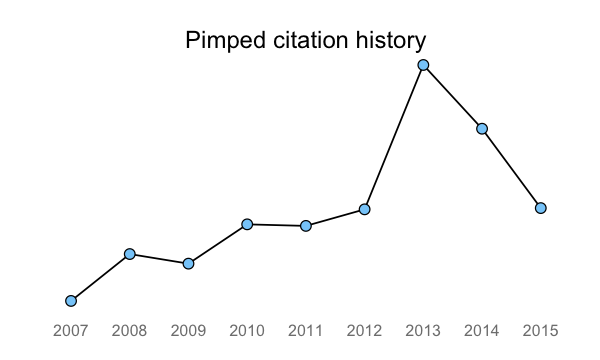

In [30]:
histGraph=ggplot(data=history, aes(x=year, y=cites))
histGraph+geom_line(stat='identity',aes(group=1),colour='black')+
    geom_point(size=3,colour='black',fill='lightskyblue',pch=21)+
    ggtitle("Pimped citation history")+
    pimpMyPlot

## Adding more information to the graph
The main reason I wrote this tutorial is that I wanted to display more than the citation history graph on my page.

I wanted to add **total cites** and **h-index**. We'll do this for Andy's profile.

Remember, we also have access to the profile data which we stored in the `profile` object by using the `get_profile()` function earlier.

We can therefore pull out this information and add it as a text annotation somewhere in our plot. This is where things get a bit tricky. `ggplot` while great at making plots (that's it's purpose) isn't the most friendly with annotating, especially when we want those annotations outside of the main plot area. But here are the tricks I figured out.

### Making room on top of the graph
I wanted the text to sit on top of the graph, one way to do this is to use the `print()` function, and instruct the plot to be smaller than the global plot dimensions we set earlier. For this we need to use the package called `grid`. It's part of the base packages of r.

Here's the plot with more room at the top:

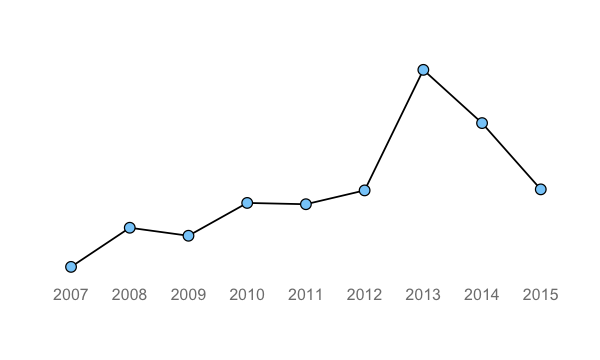

In [36]:
library(grid)

histGraph=ggplot(data=history, aes(x=year, y=cites))+
    geom_line(stat='identity',aes(group=1),colour='black')+
    geom_point(size=3,colour='black',fill='lightskyblue',pch=21)+
    pimpMyPlot
print(histGraph, vp=viewport(height=.8))

And for comparison, here's the old plot (without space on the top)

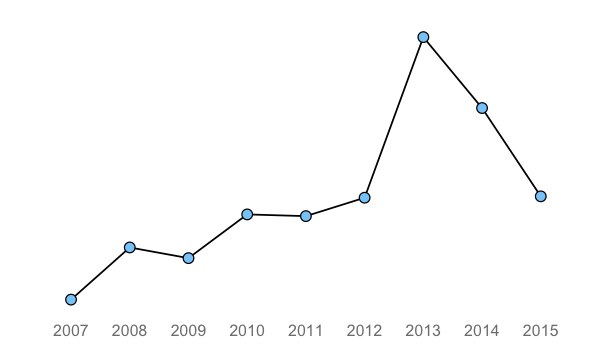

In [38]:
histGraph=ggplot(data=history, aes(x=year, y=cites))
histGraph+geom_line(stat='identity',aes(group=1),colour='black')+
    geom_point(size=3,colour='black',fill='lightskyblue',pch=21)+
    pimpMyPlot

### Adding the text
Now, all we have to do is place some text on the plot. For this we will use the `grid.text()` function from the `grid` package we loaded earlier.

The `grid.text()` function is called upon **once the graph** is printed (we just sent ggplot on a break for the rest of the day).

In that function we have a bunch of parameters we can play with:
- x and y position 1 in x means completely on the right. Here I've set it to `.95` because I want it to align with the plot more. 1 in the y means completely at the top.
- `label` sets the text to be printed. Here I concatenated the word "Citations" with data from the profile which I access by pulling the relevant entry in the object `profile$total_cites`
- `gp`, this element sets the appearance, by placing the options in `gpar()`. Here I set the colour, the font family, and face.

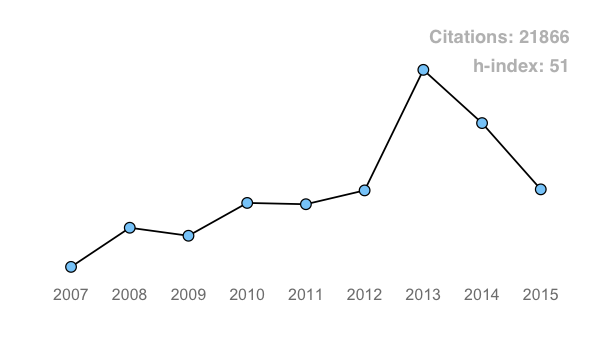

In [43]:
histGraph=ggplot(data=history, aes(x=year, y=cites))+
    geom_line(stat='identity',aes(group=1),colour='black')+
    geom_point(size=3,colour='black',fill='lightskyblue',pch=21)+
    pimpMyPlot
print(histGraph, vp=viewport(height=.8))
grid.text(x=.95, y=.9,just='right', label=paste('Citations:',profile$total_cites),gp=gpar(col="grey", fontsize=11,fontfamily='Helvetica',fontface='bold'))
grid.text(x=.95, y=.82,just='right', label=paste('h-index:',profile$h_index),gp=gpar(col="grey", fontsize=11,fontfamily='Helvetica',fontface='bold'))

**OK!!** Here's our nice graph. We just have to find a way to make it available as an image for our website. The simplest thing to do is to save the plot as a `.png` image and make it available online for embedding in our website.

### Saving the graph as an image
There are many ways to save a graph, but since we have more than a ggplot graph in our figure, we cant use the function `ggsave()`. 

The way we do it is by opening a `png` device (essentially "a file") **before** the graph instructions and then closing that device once all the graph is made to record all we did into, in our case a ".png" image.

## Pushing image to your website
### Making image available online
If you have a service like **dropbox** or **google drive** (both have free plans) just make sure you save the image in a folder of your dropbox/gdrive. You may want to either change the path of the file name in your `png()` call or place the R script you'll be writing in the same folder as where you want the image. Right now the `png()` call I have saves the file in the current folder.

**Using dropbox**
Once you have the image in your dropbox, head over to the web interface, locate your file and hit `share`. It'll pop up a box, with a link –a public link. Copy that link. It'll look like that:

`https://www.dropbox.com/s/y07121i15qso7ix/YOURPICTURE.png?dl=0`

**Using gdrive**
CHECK GOOGLE DRIVE PERMALINK AND WRITE THIS UP.

### Placing it on a page of your website

#### In a regular HTML page
Just use the HTML `<img>` tag to embed it **BUT** if you use the URL provided by dropbox without tweaking it, chances are the image won't display.

To make it work you need to add `?raw=1` at the end of the URL instead of `?dl=0`. That will change the way dropbox delivers the image and, most importantly, it'll show the image –which is what you want!

`<img src="https://www.dropbox.com/s/y07121i15qso7ix/YOURPICTURE.png?raw=1">`

You can of course change the size using the width and hieght parameters in the `<img>` tag.

#### In a page from a WordPress website
If your page is generated by the WordPress CMS, you can insert the image using the HTML `<img>` tag, but chances are that if you want to rezise the image and use the "regular" way of doing it in the tag it won't work. This is usually because WordPress requires you to do it using in a CSS tag so you'd write something like that:

`<img style="width: 200px; height: 160px;" src="https://www.dropbox.com/s/y07121i15qso7ix/YOURPICTURE.png?raw=1"/>`

Et voilà!